In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data = pd.read_csv(Path('../Resources/lending_data.csv'))

# Review the DataFrame
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data["loan_status"]

# Separate the X variable, the features
X = lending_data.drop(columns="loan_status")

In [7]:
# Review the y variable Series
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

#### Note: The split between 0 and 1 in loan_status is what would be known as severly imbalanced.
#### Thus, we will need to use a resampling technique to address this issue.

In [12]:
# Review the X variable DataFrame with describe() showing no decimal places
pd.set_option('display.float_format', lambda x: '%.0f' % x)

X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536,77536,77536,77536,77536,77536,77536
mean,9806,7,49222,0,4,0,19222
std,2093,1,8372,0,2,1,8372
min,5000,5,30000,0,0,0,0
25%,8700,7,44800,0,3,0,14800
50%,9500,7,48100,0,4,0,18100
75%,10400,8,51400,0,4,1,21400
max,23800,13,105200,1,16,3,75200


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [13]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [14]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [15]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [16]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, y_pred)

0.9520479254722232

In [18]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, y_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

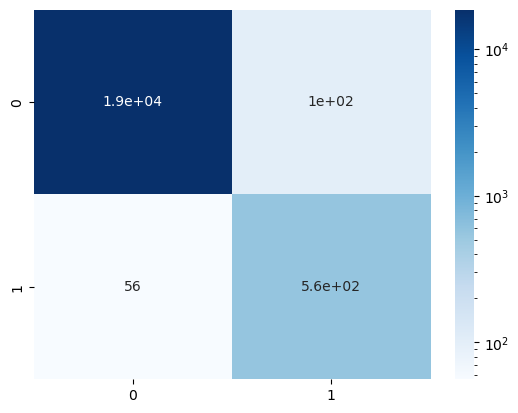

In [21]:
# Generate a more visually appealing confusion matrix using Seaborn heatmap()

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.colors import LogNorm, Normalize

# Plot the confusion matrix
ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', norm=LogNorm())
plt.show(ax1)


In [22]:
# Print the classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** It predicts '0' (healthy loan) with 100% precision, 99% recall, and 100% accuracy (F1 Score). On the other hand, the model predict '1' (unhealthy loan) with 85% precision, 91% recall, and 88% accuracy (F1 Score). The model is better at predicting '0' (healthy loan) than '1' (unhealthy loan).

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [13]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the model using the resampled training data
# YOUR CODE HERE!

# Make a prediction using the testing data
# YOUR CODE HERE!

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!

In [ ]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

In [ ]:
# Print the classification report for the model
# YOUR CODE HERE!

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!